In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.svm import OneClassSVM
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.cluster import DBSCAN

# **K-means Clustering**

In [5]:
selected_features = pd.read_csv ('Data/selected_features.csv')

C:\Users\nguye\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\nguye\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\nguye\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\nguye\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\nguye\anaconda3\lib\site-packages\sklearn\clust

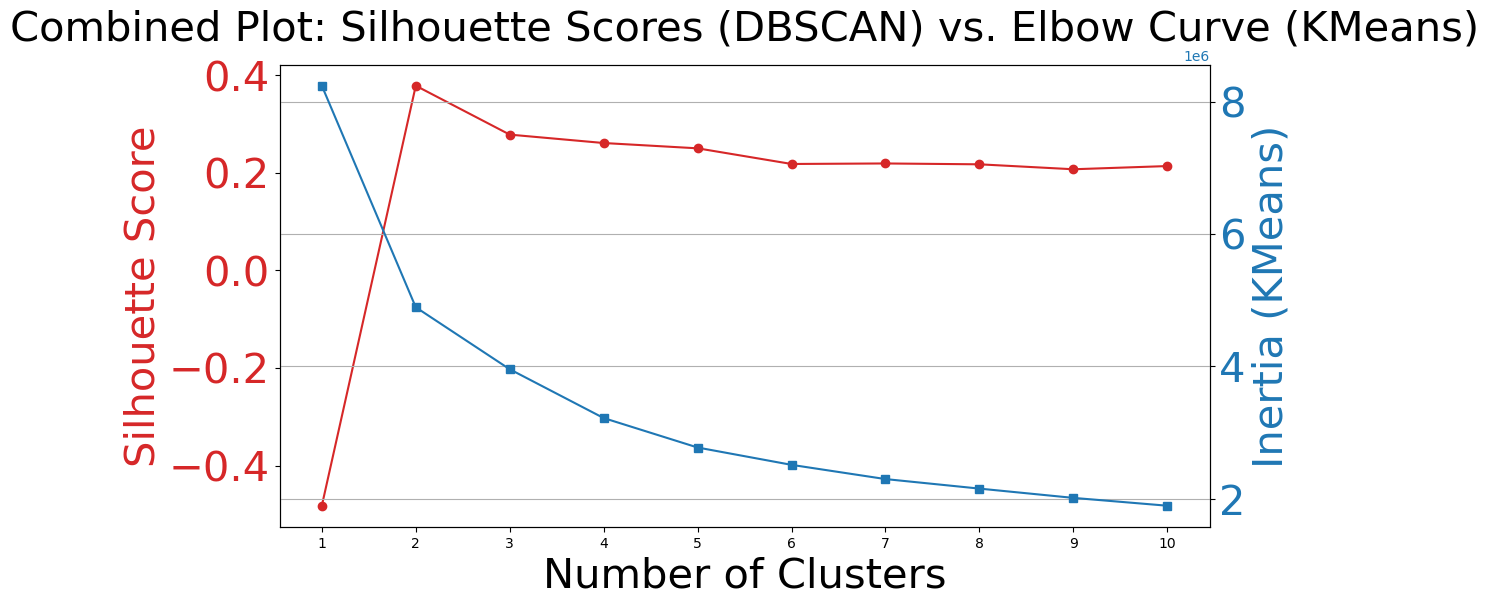

In [6]:
min_clusters = 1  # Minimum number of clusters to try
max_clusters = 10  # Maximum number of clusters to try
silhouette_scores = []  # Renamed from silhouette_score to silhouette_scores
eps = 0.5
min_samples = 5

# Assuming you have defined selected_features

for n_clusters in range(1, max_clusters + 1):
    if n_clusters == 1:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        cluster_labels = dbscan.fit_predict(selected_features.drop(columns=['NACCID']))
        silhouette_avg = silhouette_score(selected_features.drop(columns=['NACCID']), cluster_labels)
    else:
        kmeans = KMeans(n_clusters=n_clusters, random_state=0)
        cluster_labels = kmeans.fit_predict(selected_features.drop(columns=['NACCID']))
        silhouette_avg = silhouette_score(selected_features.drop(columns=['NACCID']), cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Calculate inertia for KMeans
cluster_scores_kmeans = []
for n_clusters in range(1, max_clusters + 1):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(selected_features.drop(columns=['NACCID']))
    cluster_scores_kmeans.append(kmeans.inertia_)

# Plotting both silhouette scores and elbow curve
fig, ax1 = plt.subplots(figsize=(12, 6))

color = 'tab:red'
ax1.set_xlabel('Number of Clusters', fontsize=30)
ax1.set_ylabel('Silhouette Score', color=color, fontsize=30)
ax1.plot(range(1, max_clusters + 1), silhouette_scores, marker='o', color=color)  # Changed silhouette_avg to silhouette_scores
ax1.tick_params(axis='y', labelcolor=color, labelsize=30)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
color = 'tab:blue'
ax2.set_ylabel('Inertia (KMeans)', color=color, fontsize=30)
ax2.plot(range(1, max_clusters + 1), cluster_scores_kmeans, marker='s', color=color)
ax2.tick_params(axis='y', labelcolor=color, labelsize=30)

plt.title('Combined Plot: Silhouette Scores (DBSCAN) vs. Elbow Curve (KMeans)', fontsize=30)
plt.xticks(range(1, max_clusters + 1), fontsize=30)
plt.grid(True)
plt.show()


# ADD CLASS

C:\Users\nguye\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


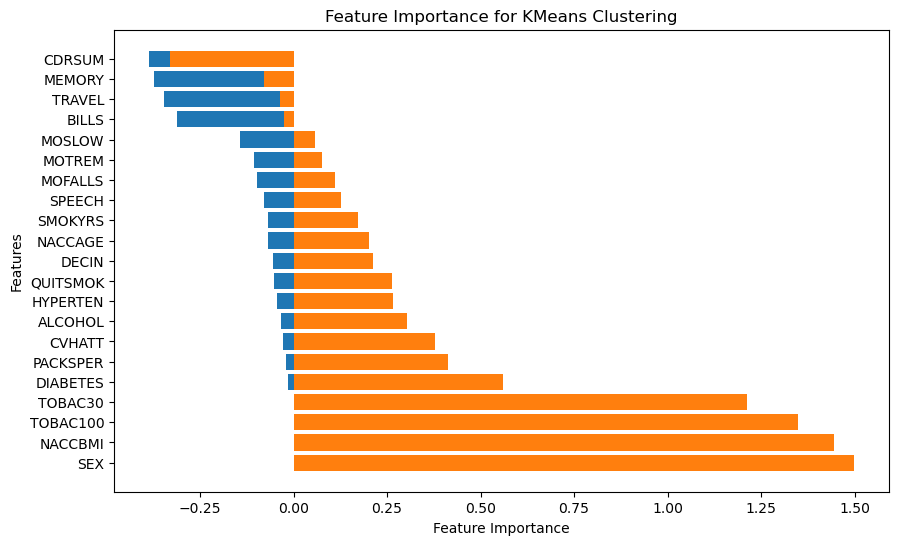

In [7]:
id_column = 'NACCID'
features = selected_features.drop(id_column, axis=1)

# Standardize numerical features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Perform k-means
kmeans = KMeans(n_clusters=2, random_state=42)
clusters = kmeans.fit_predict(scaled_features)

# Get centroids and feature importance
centroids = kmeans.cluster_centers_
feature_importance = kmeans.cluster_centers_.argsort()[:, ::-1]

feature_names = features.columns

plt.figure(figsize=(10, 6))
for cluster_num in range(len(centroids)):
    plt.barh(range(features.shape[1]), centroids[cluster_num][feature_importance[cluster_num]], align='center')
plt.yticks(range(features.shape[1]), [feature_names[i] for i in feature_importance[0]])
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importance for KMeans Clustering')
plt.show()

In [8]:
# Add class
selected_features['Class'] = clusters
selected_features

,NACCID,CDRSUM,DECIN,MOSLOW,MEMORY,SPEECH,BILLS,TRAVEL,MOFALLS,MOTREM,...,TOBAC100,SMOKYRS,PACKSPER,QUITSMOK,ALCOHOL,DIABETES,HYPERTEN,CVHATT,SEX,Class
0,NACC235922,3.5,1,0,1.0,-4,1,0,0,0,...,1,22,2,40,0,0,1,0,2,0
1,NACC383757,0.5,8,0,0.5,-4,0,0,0,0,...,1,15,5,28,2,0,1,0,1,0
2,NACC418253,2.0,1,0,1.0,-4,0,0,0,0,...,1,10,2,30,0,0,0,0,2,0
3,NACC433163,0.5,1,0,0.5,-4,8,0,0,1,...,1,2,2,17,0,0,0,0,1,0
4,NACC476187,5.0,1,0,1.0,-4,3,3,0,0,...,1,25,2,45,0,0,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13684,NACC992483,0.0,0,0,0.0,0,0,0,0,0,...,1,7,1,25,0,0,1,0,1,0
13685,NACC992483,0.0,0,0,0.0,0,0,0,0,0,...,1,7,1,25,0,0,1,0,1,0
13686,NACC992483,0.0,0,0,0.0,0,0,0,0,0,...,1,7,1,25,0,0,1,0,1,0
13687,NACC992483,0.0,0,0,0.0,0,0,0,0,0,...,1,7,1,25,0,0,1,0,1,0


In [11]:
selected_features.to_csv('Data/added_classes.csv', index=False)

In [14]:
added_classes = pd.read_csv ('Data/added_classes.csv')
class_0 = pd.read_csv ('Data/Class=0.csv')
class_1 = pd.read_csv ('Data/Class=1.csv')

In [15]:
decode_class = {
    0: 'A',
    1: 'B'
}

selected_features['Class'] = selected_features['Class'].replace(decode_class)
class_0['Class'] = class_0['Class'].replace(decode_class)
class_1['Class'] = class_1['Class'].replace(decode_class)

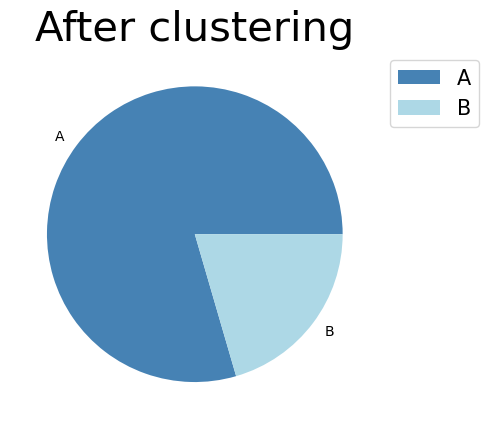

In [18]:
# Create pie chart
cluster_n = selected_features['Class'].value_counts()

# Plotting pie chart
plt.pie(cluster_n, labels=cluster_n.index, colors= ['steelblue', 'lightblue'])

# Add title
plt.title('After clustering', size = 30)
plt.legend(bbox_to_anchor=(1,1), fontsize= 15)
# Show plot
plt.show()

# put EDA code here because of interpretation

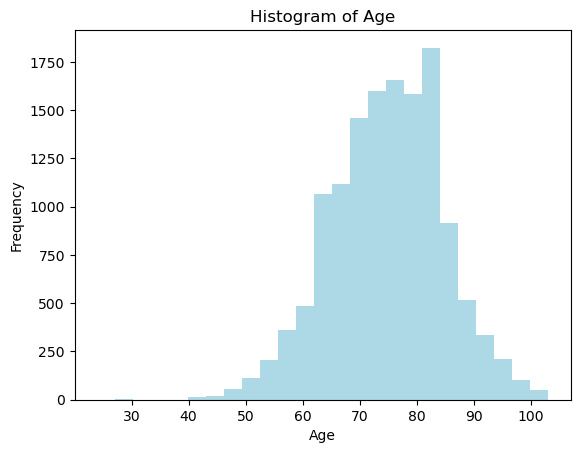

In [76]:
import matplotlib.pyplot as plt
import math
# Create histogram
plt.hist(selected_features['NACCAGE'], color='lightblue',bins =25)

# Add labels and title
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Histogram of Age')

# Show plot
plt.show()

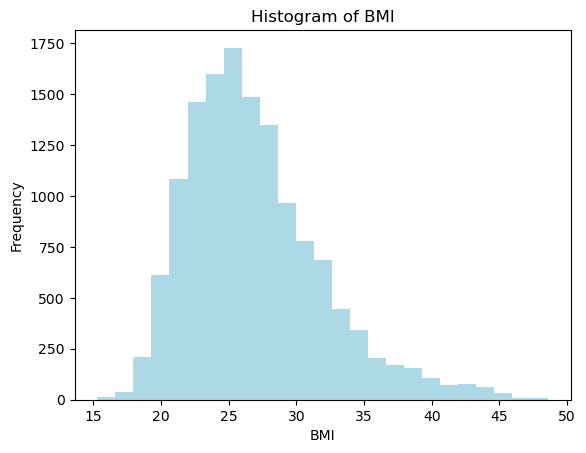

In [77]:
#Remove BMI between 0 and 50

# Create histogram
plt.hist(selected_features['NACCBMI'], color='lightblue',bins =25)

# Add labels and title
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.title('Histogram of BMI')

# Show plot
plt.show()

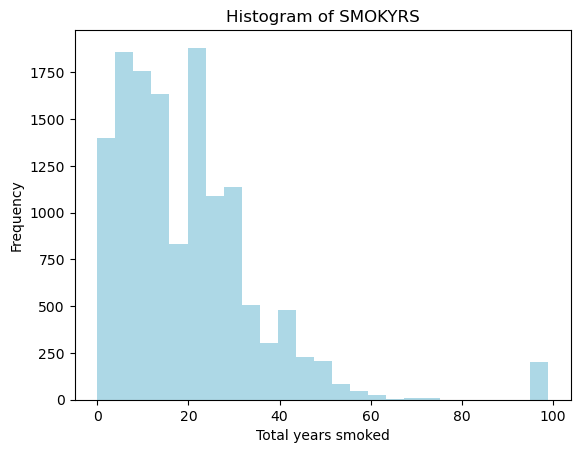

In [78]:
# Create histogram
plt.hist(selected_features['SMOKYRS'], color='lightblue',bins =25)

# Add labels and title
plt.xlabel('Total years smoked')
plt.ylabel('Frequency')
plt.title('Histogram of SMOKYRS')

# Show plot
plt.show()

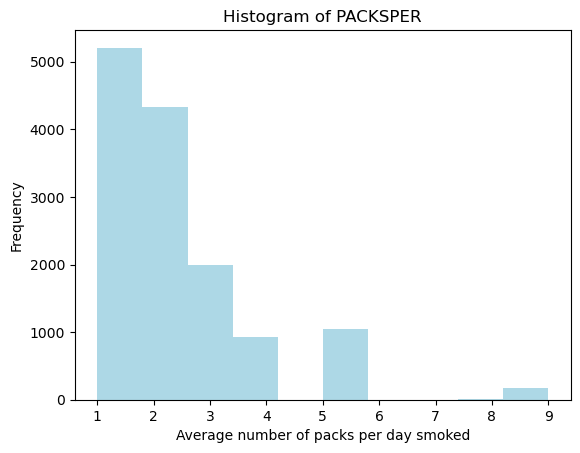

In [79]:
# Create histogram
plt.hist(selected_features['PACKSPER'], color='lightblue',bins =10)

# Add labels and title
plt.xlabel('Average number of packs per day smoked')
plt.ylabel('Frequency')
plt.title('Histogram of PACKSPER')

# Show plot
plt.show()

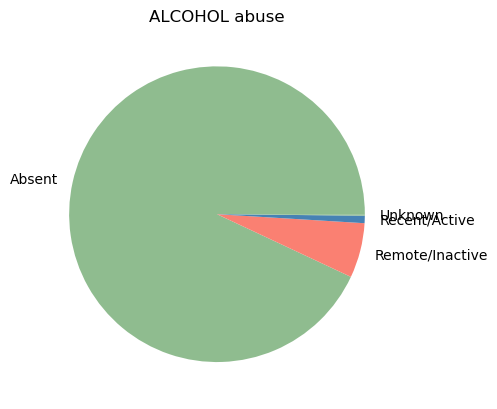

In [84]:
mapping = {
    0: 'Absent',
    1: 'Recent/Active',
    2: 'Remote/Inactive',
    9: 'Unknown',
    -4: 'Not available: UDS form submitted did not collect data in this way, or a skip pattern precludes response to this question Form, version'
}

selected_features['ALCOHOL'] = selected_features['ALCOHOL'].replace(mapping)

alcohol_classes = selected_features['ALCOHOL'].value_counts()

# Plotting pie chart
plt.pie(alcohol_classes, labels=alcohol_classes.index, colors=['darkseagreen','salmon','steelblue'])

# Add labels and title
plt.title('ALCOHOL abuse')

# Show plot
plt.show()

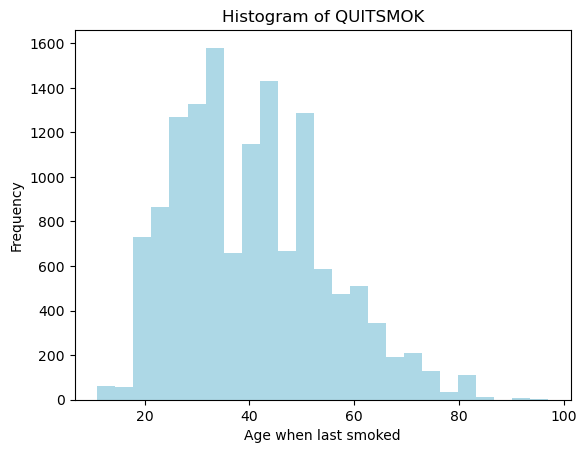

In [89]:
# Create histogram
plt.hist(selected_features['QUITSMOK'], color='lightblue',bins =25)

# Add labels and title
plt.xlabel('Age when last smoked')
plt.ylabel('Frequency')
plt.title('Histogram of QUITSMOK')

# Show plot
plt.show()

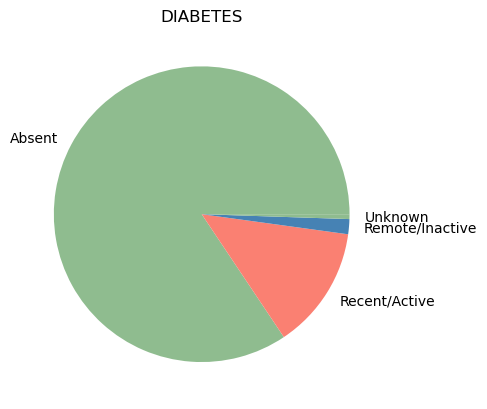

In [85]:
mapping = {
    0: 'Absent',
    1: 'Recent/Active',
    2: 'Remote/Inactive',
    9: 'Unknown',
    -4: 'Not available: UDS form submitted did not collect data in this way, or a skip pattern precludes response to this question Form, version'
}

selected_features['DIABETES'] = selected_features['DIABETES'].replace(mapping)

diabetes_classes = selected_features['DIABETES'].value_counts()

# Plotting pie chart
plt.pie(diabetes_classes, labels=diabetes_classes.index, colors=['darkseagreen','salmon','steelblue'])

# Add title
plt.title('DIABETES')
# Show plot
plt.show()

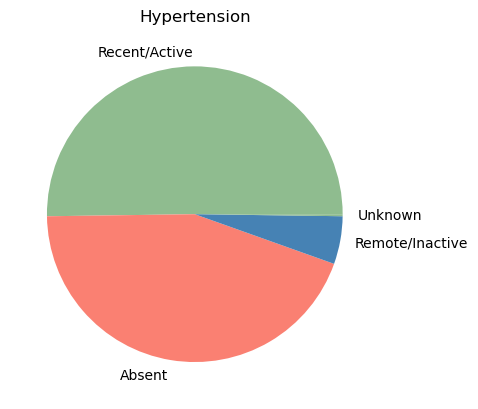

In [86]:
mapping = {
    0: 'Absent',
    1: 'Recent/Active',
    2: 'Remote/Inactive',
    9: 'Unknown',
    -4: 'Not available: UDS form submitted did not collect data in this way, or a skip pattern precludes response to this question Form, version'
}

selected_features['HYPERTEN'] = selected_features['HYPERTEN'].replace(mapping)

hypertesion_classes = selected_features['HYPERTEN'].value_counts()

# Plotting pie chart
plt.pie(hypertesion_classes, labels=hypertesion_classes.index, colors=['darkseagreen','salmon','steelblue'])

# Add title
plt.title('Hypertension')
# Show plot
plt.show()

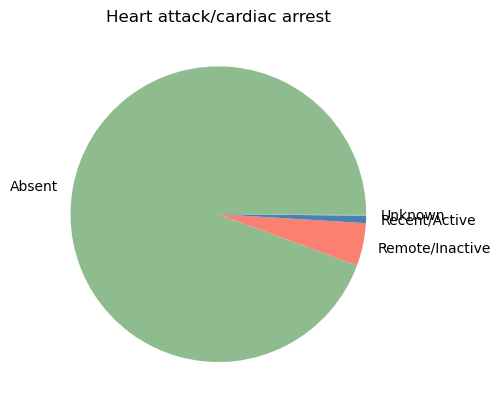

In [87]:
mapping = {
    0: 'Absent',
    1: 'Recent/Active',
    2: 'Remote/Inactive',
    9: 'Unknown',
    -4: 'Not available: UDS form submitted did not collect data in this way, or a skip pattern precludes response to this question Form, version'
}

selected_features['CVHATT'] = selected_features['CVHATT'].replace(mapping)

cvhatt_classes = selected_features['CVHATT'].value_counts()

# Plotting pie chart
plt.pie(cvhatt_classes, labels=cvhatt_classes.index, colors=['darkseagreen','salmon','steelblue'])

# Add title
plt.title('Heart attack/cardiac arrest')
# Show plot
plt.show()

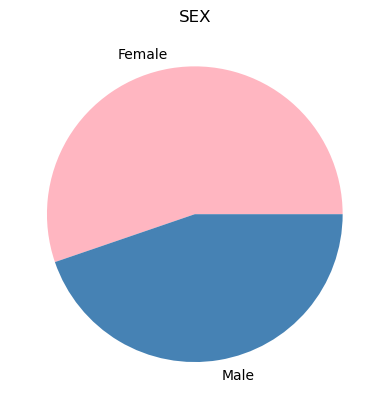

In [88]:
mapping = {
    1: 'Male',
    2: 'Female',
}

selected_features['SEX'] = selected_features['SEX'].replace(mapping)

sex_classes = selected_features['SEX'].value_counts()

# Plotting pie chart
plt.pie(sex_classes, labels=sex_classes.index, colors=['lightpink','steelblue'])

# Add title
plt.title('SEX')
# Show plot
plt.show()

In [80]:
cluster_1 = selected_features[selected_features['Class']==1]
cluster_1.to_csv('Data/Class=1.csv', index=False)

In [81]:
cluster_0 = selected_features[selected_features['Class']==0]
cluster_0.to_csv('Data/Class=0.csv', index=False)